In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
population = Table.read_table('../Data/population.csv')
countries = Table.read_table('../Data/countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
poverty = Table.read_table('../Data/poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


In [29]:
def first(values):
    return values.item(0)

In [41]:
t1 = poverty.sort('time', descending=True)
latest = t1.group('geo', first)
latest = latest.relabeled(2, 'poverty_percent')
latest

geo,time first,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


In [51]:
pop_2010 = population.where('time', 2010).drop(1)
poverty_and_pop = latest.drop(1).join('geo', pop_2010,'geo')
poverty_total = np.round(poverty_and_pop.column('population_total') * poverty_and_pop.column('poverty_percent')/100,0)
recent = poverty_and_pop.with_columns('poverty_total', poverty_total)
recent

geo,poverty_percent,population_total,poverty_total
ago,43.37,21219954,9.20309e+06
alb,0.46,2901883,13349
arg,1.41,41222875,581243
arm,1.75,2963496,51861
aus,1.36,22162863,301415
aut,0.34,8391986,28533
aze,0.31,9099893,28210
bdi,81.32,9461117,7.69378e+06
bel,0.5,10929978,54650
ben,51.61,9509798,4.90801e+06


In [59]:
poverty_map = countries.select('country', 'name', 'world_4region', 'latitude', 'longitude').join('country', recent, 'geo')
poverty_map = poverty_map.select(3, 4, 1, 2, 7).relabeled('world_4region', 'region')
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,9.20309e+06
41,20,Albania,europe,13349
-34,-64,Argentina,americas,581243
40.25,45,Armenia,europe,51861
-25,135,Australia,asia,301415
47.3333,13.3333,Austria,europe,28533
40.5,47.5,Azerbaijan,europe,28210
-3.5,30,Burundi,africa,7.69378e+06
50.75,4.5,Belgium,europe,54650
9.5,2.25,Benin,africa,4.90801e+06


In [64]:
min(poverty_map.column('poverty_total')), max(poverty_map.column('poverty_total'))

(0.0, 290881638.0)

In [65]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'poverty_total', poverty_map.column('poverty_total')/100000,
    'region', poverty_map.apply(colors.get, 'region')
)
Circle.map_table(scaled)

In [66]:
largest = poverty_map.select(2, 4).sort(1, descending=True).take(np.arange(10))
largest

name,poverty_total
India,2.90882e+08
Nigeria,9.88912e+07
China,8.39446e+07
Bangladesh,6.55743e+07
"Congo, Dem. Rep.",5.78414e+07
Indonesia,3.91413e+07
Ethiopia,3.2214e+07
Pakistan,2.16636e+07
Tanzania,1.9848e+07
Madagascar,1.84804e+07


In [67]:
def population_for_country_in_year(row_of_poverty_table):
    """Optional: Define a function to return the population 
    of a country in a year using a row from the poverty table."""
    return population.where('time', row_of_poverty_table.item('time')).where('geo', row_of_poverty_table.item('geo')).column('population_total').item(0)

def poverty_timeline(country):
    """Draw a timeline of people living in extreme poverty in a country."""
    geo = countries.where('name', country).column('country').item(0)
    country_poverty = poverty.where('geo', geo)
    Table().with_columns('Year', country_poverty.column(1), 'Number in poverty', country_poverty.column(2) / 100 * country_poverty.apply(population_for_country_in_year)).plot(0, 1)

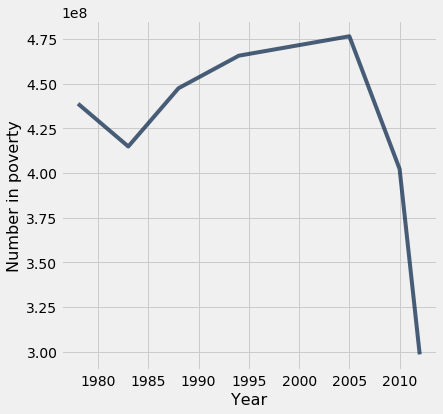

In [68]:
poverty_timeline('India')

In [69]:
# Just run this cell

all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

interactive(children=(Dropdown(description='country', options=('Angola', 'Albania', 'Argentina', 'Armenia', 'A…